# Step 2

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Read dataset
data = pd.read_csv("./data/student_performance_prediction_dataset.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## 1. Identify the members associated with your protected class variables and group together into a subset of membership categories as appropriate

In [37]:
data["gender"] = data["gender"].astype('category')
print(f'Gender: {data["gender"].unique()}')
data["race/ethnicity"] = data["race/ethnicity"].astype('category')
print(f'Race/Ethnicity: {data["race/ethnicity"].unique()}')

Gender: ['female', 'male']
Categories (2, object): ['female', 'male']
Race/Ethnicity: ['group D', 'group B', 'group C', 'group E', 'group A']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']


## 2. Discretize the values associated with your dependent variables into discrete categories/numerical values as appropriate

In [38]:
# # Math
# data["math score discrete"] = pd.cut(
#     x = data["math score"],
#     bins = [0, 59, 69, 79, 89, 100],
#     right = True,
#     labels = ["F", "D", "C", "B", "A"]
# ).astype("category")
# print(data["math score discrete"].unique())

# # Reading
# data["reading score discrete"] = pd.cut(
#     x = data["reading score"],
#     bins = [0, 59, 69, 79, 89, 100],
#     right = True,
#     labels = ["F", "D", "C", "B", "A"]
# ).astype("category")
# print(data["reading score discrete"].unique())

# # Writing
# data["writing score discrete"] = pd.cut(
#     x = data["writing score"],
#     bins = [0, 59, 69, 79, 89, 100],
#     right = True,
#     labels = ["F", "D", "C", "B", "A"]
# ).astype("category")
# print(data["writing score discrete"].unique())

In [39]:
# Math
data["math score discrete"] = pd.cut(
    x = data["math score"],
    bins = [0, 60, 100],
    right = True,
    labels = ["F", "P"]
).astype("category")
print(data["math score discrete"].unique())

# Reading
data["reading score discrete"] = pd.cut(
    x = data["reading score"],
    bins = [0, 60, 100],
    right = True,
    labels = ["F", "P"]
).astype("category")
print(data["reading score discrete"].unique())

# Writing
data["writing score discrete"] = pd.cut(
    x = data["writing score"],
    bins = [0, 60, 100],
    right = True,
    labels = ["F", "P"]
).astype("category")
print(data["writing score discrete"].unique())

['F', 'P']
Categories (2, object): ['F' < 'P']
['P', 'F']
Categories (2, object): ['F' < 'P']
['P', 'F']
Categories (2, object): ['F' < 'P']


In [40]:
# Export the discretized dataset for future analysis
data.to_csv("./data/student_performance_prediction_dataset_discrete.csv")

## 3. Compute the frequency of each membership category associated with each of your protected class variables from Step 2.1

In [41]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score discrete,reading score discrete,writing score discrete
0,female,group D,some college,standard,completed,59,70,78,F,P,P
1,male,group D,associate's degree,standard,none,96,93,87,P,P,P
2,female,group D,some college,free/reduced,none,57,76,77,F,P,P
3,male,group B,some college,free/reduced,none,70,70,63,P,P,P
4,female,group D,associate's degree,standard,none,83,85,86,P,P,P


In [42]:
data.groupby(["gender"], observed=True).size()

gender
female    492
male      508
dtype: int64

In [43]:
data.groupby(["race/ethnicity"], observed=True).size()

race/ethnicity
group A     79
group B    198
group C    323
group D    257
group E    143
dtype: int64

## 4. Create a histogram for each protected class variable that graphs the frequency values of its membership categories as a function of the dependent variables

#### Gender

<Axes: xlabel='gender'>

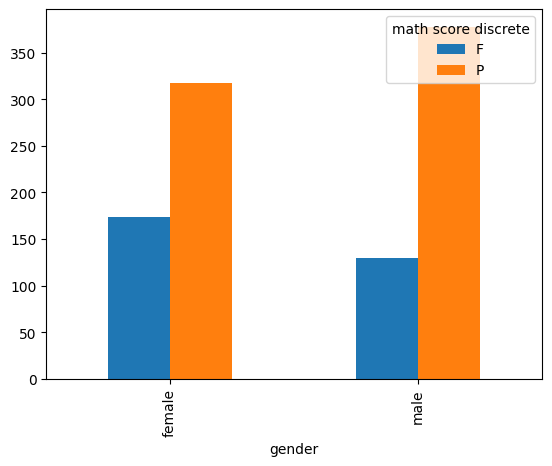

In [44]:
df_grouped = data.groupby(["gender", "math score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='gender'>

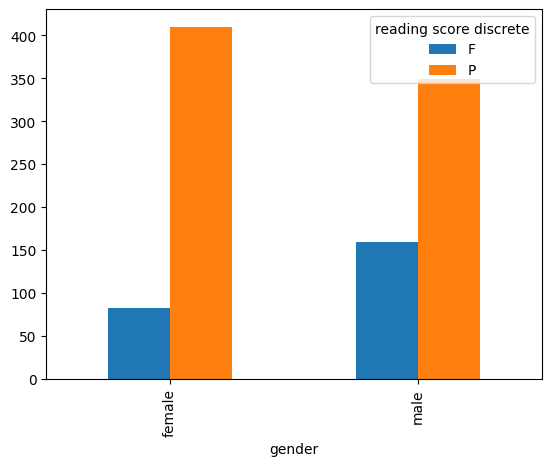

In [45]:
df_grouped = data.groupby(["gender", "reading score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='gender'>

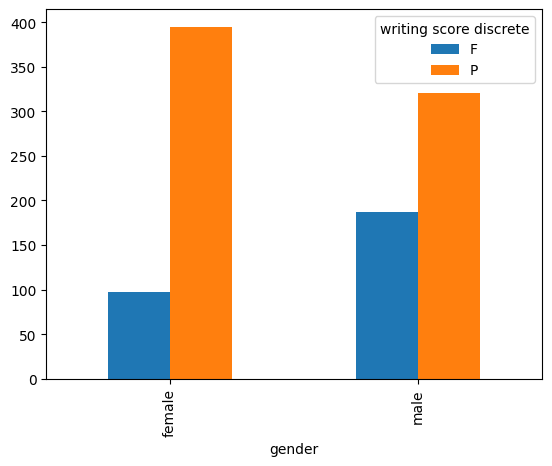

In [46]:
df_grouped = data.groupby(["gender", "writing score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

#### Race/Ethnicity

<Axes: xlabel='race/ethnicity'>

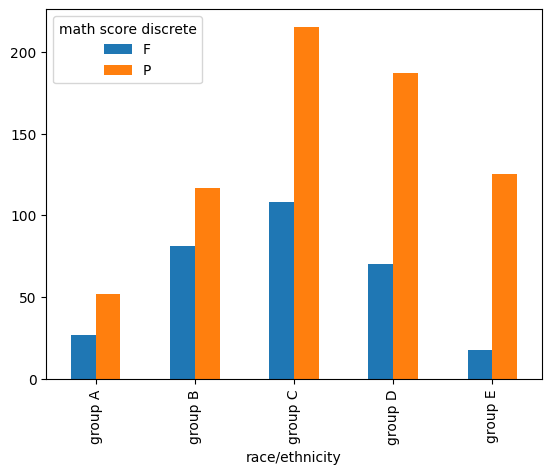

In [47]:
df_grouped = data.groupby(["race/ethnicity", "math score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

<Axes: xlabel='race/ethnicity'>

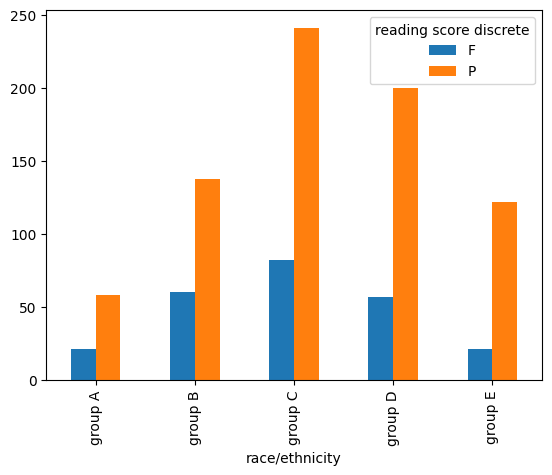

In [48]:
df_grouped = data.groupby(["race/ethnicity", "reading score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

# Step 3

In [49]:
# Read dataset
df = pd.read_csv("./data/student_performance_prediction_dataset.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [50]:
# For Gender: unprivileged group: female; priviliged group: male;
# For Race: unprivileged group: Non-Group E; priviliged group: Group E;
# Fairness metrics:
# Statistical Parity Difference
# Disparate Impact
# If math score >= 60 and writing score >= 60, this will be the favorable outcome; if math score < 60 and writing score < 60, this will be the unfavorable outcome.

male_math_favorable, female_math_favorable, male_writing_favorable, female_writing_favorable, male_math_unfavorable, female_math_unfavorable, male_writing_unfavorable, female_writing_unfavorable = 0, 0, 0, 0, 0, 0, 0, 0
groupE_math_favorable, nongroupE_math_favorable, groupE_writing_favorable, nongroupE_writing_favorable, groupE_math_unfavorable, nongroupE_math_unfavorable, groupE_writing_unfavorable, nongroupE_writing_unfavorable = 0, 0, 0, 0, 0, 0, 0, 0

In [51]:
for index, row in df.iterrows():
  if row['gender'] == 'male':
    if row['math score'] >= 60:
      male_math_favorable += 1
    else:
      male_math_unfavorable += 1
    if row['writing score'] >= 60:
      male_writing_favorable += 1
    else:
      male_writing_unfavorable += 1
  else:
    if row['math score'] >= 60:
      female_math_favorable += 1
    else:
      female_math_unfavorable += 1
    if row['writing score'] >= 60:
      female_writing_favorable += 1
    else:
      female_writing_unfavorable += 1
  if row['race/ethnicity'] == 'group C' or row['race/ethnicity'] == 'group D':
    if row['math score'] >= 60:
      groupE_math_favorable += 1
    else:
      groupE_math_unfavorable +=1
    if row['writing score'] >= 60:
      groupE_writing_favorable += 1
    else:
      groupE_writing_unfavorable +=1
  else:
    if row['math score'] >= 60:
      nongroupE_math_favorable += 1
    else:
      nongroupE_math_unfavorable +=1
    if row['writing score'] >= 60:
      nongroupE_writing_favorable += 1
    else:
      nongroupE_writing_unfavorable +=1

In [52]:
og_gender_math_disparate_impact = (female_math_favorable / (female_math_favorable + female_math_unfavorable)) / (male_math_favorable / (male_math_favorable + male_math_unfavorable))
og_gender_writing_disparate_impact = (female_writing_favorable / (female_writing_favorable + female_writing_unfavorable)) / (male_writing_favorable / (male_writing_favorable + male_writing_unfavorable))
og_race_math_disparate_impact = (nongroupE_math_favorable / (nongroupE_math_favorable + nongroupE_math_unfavorable)) / (groupE_math_favorable / (groupE_math_favorable + groupE_math_unfavorable))
og_race_writing_disparate_impact = (nongroupE_writing_favorable / (nongroupE_writing_favorable + nongroupE_writing_unfavorable)) / (groupE_writing_favorable / (groupE_writing_favorable + groupE_writing_unfavorable))

og_gender_math_statistical_parity = (female_math_favorable / (female_math_favorable + female_math_unfavorable)) - (male_math_favorable / (male_math_favorable + male_math_unfavorable))
og_gender_writing_statistical_parity = (female_writing_favorable / (female_writing_favorable + female_writing_unfavorable)) - (male_writing_favorable / (male_writing_favorable + male_writing_unfavorable))
og_race_math_statistical_parity = (nongroupE_math_favorable / (nongroupE_math_favorable + nongroupE_math_unfavorable)) - (groupE_math_favorable / (groupE_math_favorable + groupE_math_unfavorable))
og_race_writing_statistical_parity = (nongroupE_writing_favorable / (nongroupE_writing_favorable + nongroupE_writing_unfavorable)) - (groupE_writing_favorable / (groupE_writing_favorable + groupE_writing_unfavorable))

original_metrics = [og_gender_math_disparate_impact,
                   og_race_math_disparate_impact,
                   og_gender_writing_disparate_impact,
                   og_race_writing_disparate_impact,
                   og_gender_math_statistical_parity,
                   og_race_math_statistical_parity,
                   og_gender_writing_statistical_parity,
                   og_race_writing_statistical_parity]
independent_lables = ['gender', 'race', 'gender', 'race', 'gender', 'race', 'gender',  'race']
dependent_lables = ['math score', 'math score', 'writing score', 'writing score', 'math score',  'math score', 'writing score', 'writing score']
metric_names = ['disparate impact', 'disparate impact', 'disparate impact', 'disparate impact', 'statistical parity', 'statistical parity', 'statistical parity', 'statistical parity']

og_summary_table = list(zip(independent_lables, dependent_lables, metric_names, original_metrics))
og_summary_df = pd.DataFrame(og_summary_table, columns = ['Indepedent Variable', 'Dependent Variable', 'Fairness Metric', 'Original Metric Value'])
og_summary_df.head(10)

,Indepedent Variable,Dependent Variable,Fairness Metric,Original Metric Value
0,gender,math score,disparate impact,0.875108
1,race,math score,disparate impact,1.009801
2,gender,writing score,disparate impact,1.269594
3,race,writing score,disparate impact,0.994672
4,gender,math score,statistical parity,-0.095144
5,race,math score,statistical parity,0.006979
6,gender,writing score,statistical parity,0.175661
7,race,writing score,statistical parity,-0.003941


In [53]:
protected_gender = 'gender'
protected_race = 'race/ethnicity'
privileged_gender = 'male'
privileged_race = 'group C' or 'group D'

# Define the threshold for a favorable outcome
threshold = 60

# Calculate group statistics
privileged_group_stats = df[(df[protected_gender] == privileged_gender) & (df[protected_race] == privileged_race)]
unprivileged_group_stats = df[~((df[protected_gender] == privileged_gender) & (df[protected_race] == privileged_race))]

num_privileged = privileged_group_stats.shape[0]
num_unprivileged = unprivileged_group_stats.shape[0]

num_favorable_privileged = (privileged_group_stats['math score'] >= threshold).sum()
num_favorable_unprivileged = (unprivileged_group_stats['math score'] >= threshold).sum()

# Calculate reweighing weights
weight_multiplier = num_unprivileged / num_favorable_unprivileged

df['weights'] = df.apply(
    lambda row: weight_multiplier if (
        (row[protected_gender] == privileged_gender) and (row[protected_race] == privileged_race)
    ) else 1.0,
    axis=1
)
# print("Weight Multiplier:", weight_multiplier)
# print("Sample Weights for Privileged Group:", df[df[protected_gender] == privileged_gender]['weights'])
# print("Sample Weights for Unprivileged Group:", df[df[protected_gender] != privileged_gender]['weights'])
# Save the reweighed dataset as reweighed_df
reweighted_data = df.copy()

# Reweight "math_score" and "writing_score" using the "weights" column
reweighted_data['reweighted_math_score'] = reweighted_data['math score'] / reweighted_data['weights']
reweighted_data['reweighted_writing_score'] = reweighted_data['writing score'] / reweighted_data['weights']


# Save the new reweighted dataset to a CSV file
# reweighted_data.to_csv("/content/drive/MyDrive/Colab Notebooks/reweighted_dataset.csv", index=False)


In [54]:

# Define the protected attributes and the binary outcome variable
protected_attributes = ['gender', 'race/ethnicity']
binary_outcome_variables = ['reweighted_math_score', 'reweighted_writing_score']
threshold_for_favorable_outcome = 60  # Set the threshold to 60 for a favorable outcome

disparate_impacts = {}
statistical_parity_differences = {}

for binary_outcome_variable in binary_outcome_variables:
    disparate_impacts[binary_outcome_variable] = {}
    statistical_parity_differences[binary_outcome_variable] = {}

    for protected_attribute in protected_attributes:
        # Calculate the acceptance rates for privileged and unprivileged groups
        if protected_attribute == 'gender':
            privileged_group = reweighted_data[reweighted_data[protected_attribute] == 'male']
            unprivileged_group = reweighted_data[reweighted_data[protected_attribute] == 'female']
        elif protected_attribute == 'race/ethnicity':
            privileged_group = reweighted_data[reweighted_data[protected_attribute].isin(['group C', 'group D'])]
            unprivileged_group = reweighted_data[~reweighted_data[protected_attribute].isin(['group C', 'group D'])]

        # Weighted acceptance rates
        weighted_acceptance_rate_privileged = ((privileged_group[binary_outcome_variable] >= threshold_for_favorable_outcome)).sum() / privileged_group['weights'].sum()
        weighted_acceptance_rate_unprivileged = ((unprivileged_group[binary_outcome_variable] >= threshold_for_favorable_outcome)).sum() / unprivileged_group['weights'].sum()

        # Calculate disparate impact
        disparate_impact = weighted_acceptance_rate_unprivileged / weighted_acceptance_rate_privileged
        disparate_impacts[binary_outcome_variable][protected_attribute] = disparate_impact
        statistical_parity_difference = weighted_acceptance_rate_unprivileged - weighted_acceptance_rate_privileged
        statistical_parity_differences[binary_outcome_variable][protected_attribute] = statistical_parity_difference

# Display results
# for binary_outcome_variable, values in statistical_parity_differences.items():
#    for protected_attribute, spd_value in values.items():
#        print(f"Statistical Parity Difference for {protected_attribute} in {binary_outcome_variable}: {spd_value}")

# Display results
# for binary_outcome_variable, values in disparate_impacts.items():
#    for protected_attribute, di_value in values.items():
#        print(f"Disparate Impact for {protected_attribute} in {binary_outcome_variable}: {di_value}")

new_metrics = [value for outer_dict in disparate_impacts.values() for value in outer_dict.values()] + [value for outer_dict in statistical_parity_differences.values() for value in outer_dict.values()]
og_summary_df['New Metric Value'] = new_metrics
og_summary_df.head(10)

,Indepedent Variable,Dependent Variable,Fairness Metric,Original Metric Value,New Metric Value
0,gender,math score,disparate impact,0.875108,1.391586
1,race,math score,disparate impact,1.009801,1.542996
2,gender,writing score,disparate impact,1.269594,2.144893
3,race,writing score,disparate impact,0.994672,1.490232
4,gender,math score,statistical parity,-0.095144,0.187597
5,race,math score,statistical parity,0.006979,0.253040
6,gender,writing score,statistical parity,0.175661,0.441559
7,race,writing score,statistical parity,-0.003941,0.242023


<Axes: xlabel='race/ethnicity'>

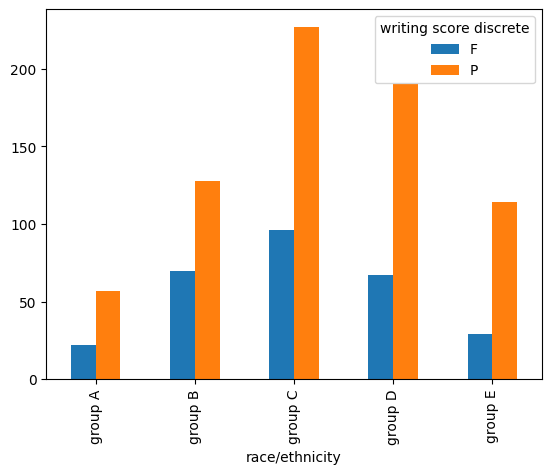

In [55]:
df_grouped = data.groupby(["race/ethnicity", "writing score discrete"], observed=True).size()
df_grouped.unstack().plot.bar()

# Step 4

In [56]:
def evaluate_model(data, cutoff_score=60, dependent_variable='math score'):
    """
    Step 4 - training classifier and get fairness metrics.
                # dependent variable : math score ( 60 as cutoff for binary classification)
                # protected class: Gender
                # privileged/unprivileged groups associated: Male/Female
                # two fairness metrics calculated : SPD and DI
                # classifier used: RandomForestClassifier

    Parameters:
    - data: The dataset including the protected attribute 'gender'. 
    - cutoff_score: The cutoff for the binary classification. Defaults to 60.
    - Depenent_variable: dependent variable choose for this step. Default to math score.
    
    Returns:
    - accuracy: Accuracy of the classifier.
    - spd: Statistical Parity Difference.
    - di: Disparate Impact.
    """

    # Prepare the features and target variables
    X = data.drop([dependent_variable], axis=1)
    y = (data[dependent_variable] >= cutoff_score).astype(int)

    # One-hot encoding for categorical columns
    categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
    X = pd.get_dummies(X, columns=categorical_columns)
    
    # Split the dataset into training and testing datasets 80/20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Compute the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create a BinaryLabelDataset for aif360 metrics
    test_dataset = BinaryLabelDataset(df=pd.concat((X_test, y_test), axis=1),
                                      label_names=[dependent_variable], #outcome of interest
                                      protected_attribute_names=['gender_male'], #protected attribute
                                      unprivileged_protected_attributes=[0]) #value within the protected attribute is considered unprivileged

    test_pred_dataset = test_dataset.copy()
    test_pred_dataset.labels = y_pred.reshape(-1, 1) # predict y from test data used to calculated fairness metrics

    # Compute fairness metrics
    privileged_groups = [{'gender_male': 1}]
    unprivileged_groups = [{'gender_male': 0}]
    
    metric = BinaryLabelDatasetMetric(test_pred_dataset,
                                      unprivileged_groups=unprivileged_groups,
                                      privileged_groups=privileged_groups)
    spd = metric.statistical_parity_difference()
    di = metric.disparate_impact()
    print(f"Accuracy: {accuracy}")
    print(f"Statistical Parity Difference: {spd}")
    print(f"Disparate Impact: {di}") 

In [57]:
original_data = pd.read_csv(r'./data/student_performance_prediction_dataset.csv').drop(['reading score','writing score'], axis=1)
reweight_data = pd.read_csv(r'./data/reweighted_dataset.csv').drop(['math score','reading score','writing score','weights','reweighted_writing_score'], axis=1)                

print('original_data  (no reweighing) result as below:')
evaluate_model(data=original_data)
print('')
print('reweighing data result as below:')
evaluate_model(data=reweight_data,dependent_variable='reweighted_math_score')
 

FileNotFoundError: [Errno 2] No such file or directory: './data/reweighted_dataset.csv'